# Calculating Implied Volatality for NIFTY Options

In [1]:
import pandas as pd
import numpy as np
from mibian import BS
import mibian as mb

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\Calculating-Implied-Option-Volatality-for-NIFTY-OPTIONS-master\OptionData.csv')

In [2]:
pip install mibian

  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4039 sha256=9a75922f92febc0bfc80e8d9ea61f170f14019f758f08e58ae92c61f31f853ad
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\bb\8e\88\9401e806f2eaf5d2f4e775e598c27d7cc09bfb06998d075093
Successfully built mibian
Note: you may need to restart the kernel to use updated packages.


In [3]:
data['IV for CALL'] = 0
data['IV for PUT'] =0


In [4]:
data.head()


,CALLS IV,CALLS Bid Qty,CALLS Bid Price,CALLS Ask Price,Strike Price,PUTS Bid Price,PUTS Ask Price,PUTS IV,IV for CALL,IV for PUT
0,NaN,75,893.85,906.40,11000,1.85,2.00,28.38,0,0
1,NaN,300,827.30,874.70,11050,1.05,2.35,27.16,0,0
2,NaN,75,794.00,807.10,11100,2.00,2.15,25.84,0,0
3,NaN,75,748.35,758.50,11150,2.25,2.70,25.20,0,0
4,NaN,75,696.95,706.15,11200,2.10,2.25,23.17,0,0


# using mibian library
#BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [5]:
S0 = 11890
K = np.array(data['Strike Price'])
C_Market = np.array(data['CALLS Ask Price'])
P_Market = np.array(data['PUTS Ask Price'])
r = 0.06/252
T = 5
IV_CALL = np.array(data['IV for CALL'])
IV_PUT = np.array(data['IV for PUT'])
i = 0

In [6]:
for i in range(len(data)):
    IV_CALL[i] = mb.BS([S0 , K[i],r, T],callPrice = C_Market[i]).impliedVolatility
    IV_PUT[i] = mb.BS([S0 , K[i],r, T],putPrice = P_Market[i]).impliedVolatility
              

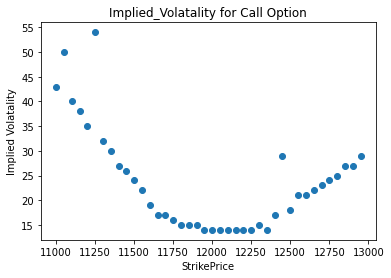

In [7]:
import matplotlib.pyplot as plt
plt.scatter(K , IV_CALL)
plt.xlabel('StrikePrice')
plt.ylabel('Implied Volatality')
plt.title('Implied_Volatality for Call Option')
plt.show()

In [10]:
data['IV for CALL'] = pd.DataFrame(IV_CALL)

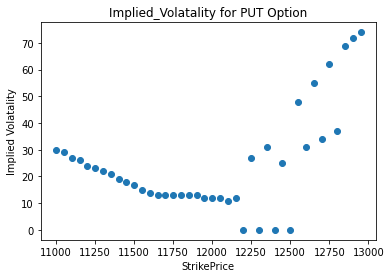

In [11]:
plt.scatter(K , IV_PUT)
plt.xlabel('StrikePrice')
plt.ylabel('Implied Volatality')
plt.title('Implied_Volatality for PUT Option')
plt.show()

In [12]:
data['IV for PUT'] = pd.DataFrame(IV_PUT)

In [13]:
data

,CALLS IV,CALLS Bid Qty,CALLS Bid Price,CALLS Ask Price,Strike Price,PUTS Bid Price,PUTS Ask Price,PUTS IV,IV for CALL,IV for PUT
0,NaN,75,893.85,906.40,11000,1.85,2.00,28.38,43,30
1,NaN,300,827.30,874.70,11050,1.05,2.35,27.16,50,29
2,NaN,75,794.00,807.10,11100,2.00,2.15,25.84,40,27
3,NaN,75,748.35,758.50,11150,2.25,2.70,25.20,38,26
4,NaN,75,696.95,706.15,11200,2.10,2.25,23.17,35,24
5,NaN,"1,125",576.85,717.95,11250,2.05,2.55,22.16,54,23
6,NaN,75,597.80,607.50,11300,2.70,2.90,21.13,32,22
7,NaN,75,547.70,558.70,11350,2.65,4.00,19.97,30,21
8,NaN,375,499.80,507.90,11400,3.50,3.65,18.98,27,19
9,NaN,75,449.05,458.85,11450,3.55,3.95,17.47,26,18
